# Capstone 1: The Fight Against Malaria
### Machine Learning

Here I will be attempting to fit a regression model to the data using the features to predict the point prevalence as an indicator of the impact of malaria in an area.

In [20]:
# Import Packages
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
%matplotlib inline  

from sklearn.model_selection import train_test_split

In [19]:
# import the data
df_main = pd.read_csv('data/df_main.csv')
df_main = df_main[df_main['reported_cases'] > 0]

In [32]:
df_main['inci'] = (df_main['reported_cases'] / df_main['population']) * 100000

In [33]:
df_main['mort'] = (df_main['reported_deaths'] / df_main['reported_cases']) * 100000

In [21]:
df_main.columns

Index(['Unnamed: 0', 'year', 'region', 'country_name', 'country_code',
       'population', 'reported_cases', 'reported_deaths', 'rainfall',
       'temperature', 'percent_agg', 'percent_urb', 'gdp_per_cap',
       'pop_density', 'point_prevalence'],
      dtype='object')

In [31]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 5 to 1230
Data columns (total 17 columns):
Unnamed: 0          1160 non-null int64
year                1160 non-null int64
region              1160 non-null object
country_name        1160 non-null object
country_code        1160 non-null object
population          1160 non-null float64
reported_cases      1160 non-null int64
reported_deaths     1160 non-null int64
rainfall            1160 non-null float64
temperature         1160 non-null float64
percent_agg         1160 non-null float64
percent_urb         1160 non-null float64
gdp_per_cap         1160 non-null float64
pop_density         1160 non-null float64
point_prevalence    1160 non-null float64
inci                1160 non-null float64
mort                1160 non-null float64
dtypes: float64(10), int64(4), object(3)
memory usage: 203.1+ KB


In [34]:
pp = df_main['mort']

In [45]:
y = df_main['point_prevalence']
X = df_main[['rainfall', 'temperature', 'percent_agg', 'percent_urb', 'gdp_per_cap', 'pop_density']]

In [24]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('y ~ X', df_main).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     18.56
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           1.12e-20
Time:                        14:47:52   Log-Likelihood:                 1946.4
No. Observations:                1160   AIC:                            -3879.
Df Residuals:                    1153   BIC:                            -3843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.007      0.040      0.9

In [36]:
y = y.reshape(-1,1)

In [37]:
X = X.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [10]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test, y_test)
reg_all,score(X_test, y_test)

NameError: name 'linear_model' is not defined

In [47]:

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.06124863  0.05768116 -0.00728029  0.09969359  0.090246  ]
Average 5-Fold CV Score: 0.06031781684275508


[ 0.  0.  0. -0. -0.  0.]


ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

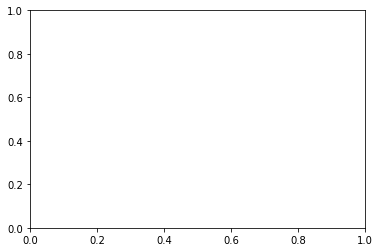

In [28]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

df_columns = [['temperature', 'rainfall', 'gdp_per_cap', 
             'pop_density', 'percent_agg', 'percent_urb', ]]
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()
